
Detection Model Used:  opencv
Faces found in known_face file:


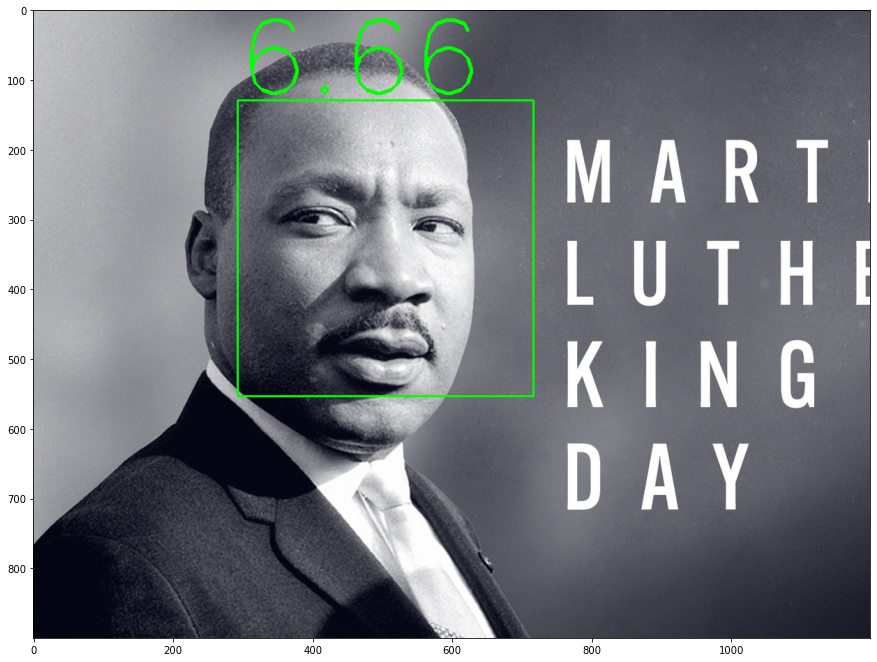

Time required to find in db_path:  5.9 seconds

Face found in the following db_path files


,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,./TestImages/database/neu_m039md26w-master.jpg,293,129,424,424,0.207289
1,./TestImages/database/neu_m039md26w-master.jpg,293,129,424,424,0.348247





Detection Model Used:  ssd
Faces found in known_face file:


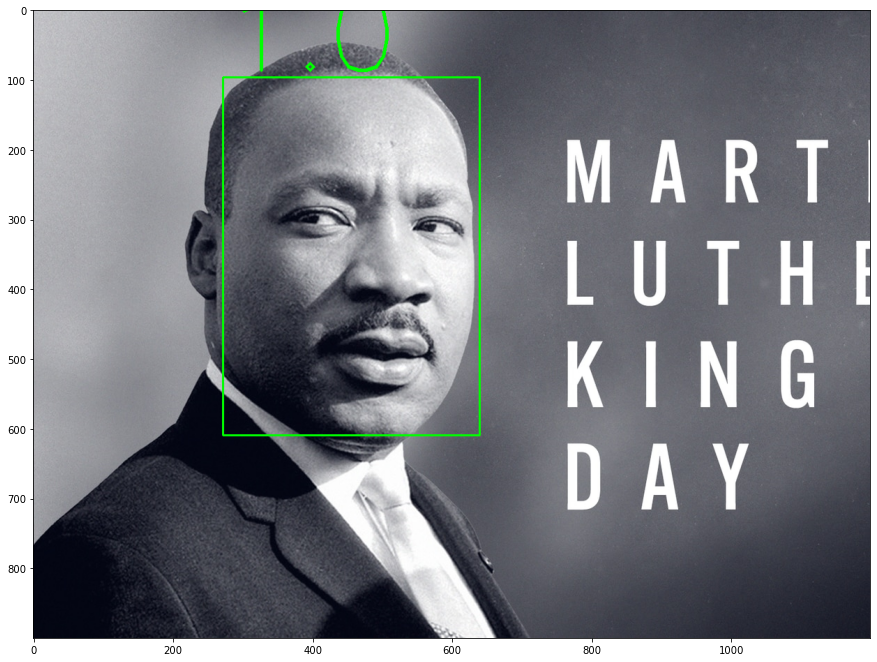

Time required to find in db_path:  2.46 seconds

Face found in the following db_path files


,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,./TestImages/database/neu_m039md26w-master.jpg,272,96,368,513,0.159504
1,./TestImages/database/neu_m039md26w-master.jpg,272,96,368,513,0.272807
2,./TestImages/database/sidney-poitier.jpg,272,96,368,513,0.310976





Detection Model Used:  mtcnn
Faces found in known_face file:
1/1 [==============================] - 0s 25ms/step


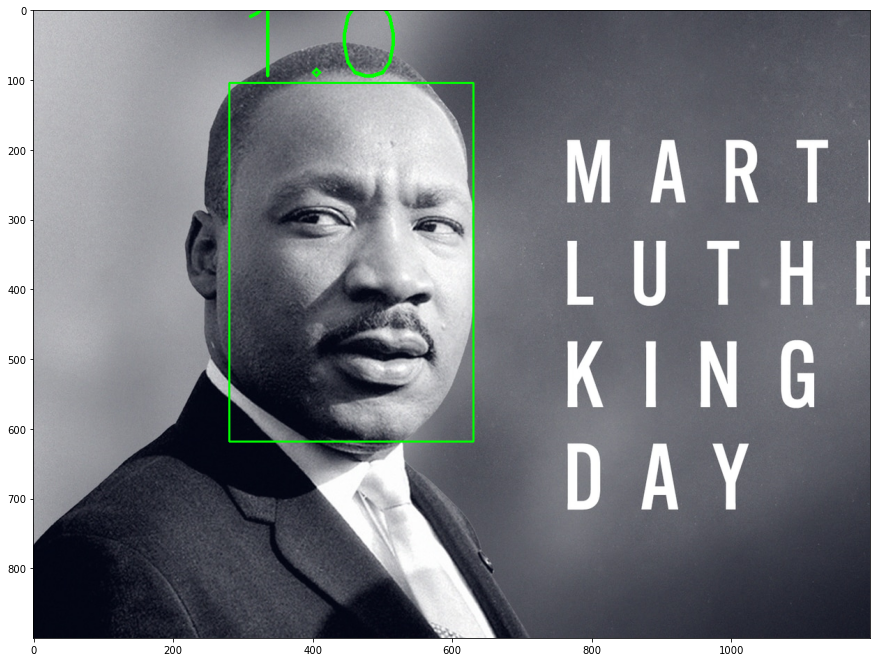

1/1 [==============================] - 0s 21ms/step
Time required to find in db_path:  14.24 seconds

Face found in the following db_path files


,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,./TestImages/database/neu_m039md26w-master.jpg,281,104,350,514,0.192607
1,./TestImages/database/neu_m039md26w-master.jpg,281,104,350,514,0.296308
2,./TestImages/database/sidney-poitier.jpg,281,104,350,514,0.304941
3,./TestImages/database/neu_129523-highres.jpg,281,104,350,514,0.320321
4,./TestImages/database/neu_129528-highres.jpg,281,104,350,514,0.332158


In [29]:
from deepface import DeepFace
import os
import time
import cv2
import matplotlib.pyplot as plt

db_path = './TestImages/database'
known_face = './TestImages/googleMLKimage.jpg'

dfs = {}
detectors = ['opencv','ssd','mtcnn']

image = cv2.imread(known_face)

for detector in detectors:
    #pkl file holds vector representation of faces in db_path images
    #those representations need to be updated each time the faces are updates
    #using a different detection algorithm means the faces will be different
    #so we want to delete the pkl file each time and create a new one
    try:
        os.remove('./TestImages/database/representations_vgg_face.pkl')
    except:
        pass
    #show faces in known face_file with given detector
    print('\nDetection Model Used: ',detector)
    print('Faces found in known_face file:')

    img = DeepFace.extract_faces(img_path=image,detector_backend = detector,enforce_detection=False)
    #img is a list of dictionaries, each item corresponds to a detected face
    #copy image so we can draw boxes on it
    imgwithbox=image.copy()
    #loop through the detected faces
    for i in img:
        f_a = i['facial_area']
        #draw a box, use the bottom left x,y and top right x,y coordinates, tuple for color, and last parameter is box line thickness
        imgwithbox=cv2.rectangle(imgwithbox,(f_a['x'],f_a['y']),(f_a['x']+f_a['w'],f_a['y']+f_a['h']),(0,255,0),2)
        #add confidence score text to box
        cv2.putText(imgwithbox, str(round(i['confidence'],2)), (f_a['x'], f_a['y']-10), cv2.FONT_HERSHEY_SIMPLEX, 5, (0,255,0), 4)

    #show the image with the detected faces
    plt.figure(figsize=(15,15))
    plt.imshow(imgwithbox[:,:,::-1])
    plt.show()

    tic=time.time()
    dfs[detector] = DeepFace.find(image,db_path,enforce_detection=False,detector_backend=detector,silent=True)
    toc=time.time()
    print('Time required to find in db_path: ',round(toc-tic,2),'seconds\n')
    print('Face found in the following db_path files')
    display(dfs[detector][0])
    print('\n')
    os.remove('./TestImages/database/representations_vgg_face.pkl')